In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from matplotlib import gridspec
from pylab import rcParams
rcParams['figure.figsize'] = 14,8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
from sklearn.preprocessing import StandardScaler


In [ ]:
card_data = pd.read_csv('/content/creditcard.csv')

In [ ]:
card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
card_data.shape

(59511, 31)

In [ ]:
card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,59511.000000,59511.000000,59511.000000,59511.000000,59511.000000,59511.000000,59511.000000,59511.000000,59511.000000,59511.000000,...,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000
mean,31748.304398,-0.238817,-0.010192,0.688628,0.171355,-0.259802,0.102828,-0.114713,0.055186,0.063558,...,-0.027845,-0.107505,-0.039753,0.006762,0.136147,0.020146,0.002969,0.004292,95.417957,0.002722
std,13666.604320,1.866654,1.658360,1.446481,1.386071,1.394132,1.308181,1.251962,1.191471,1.183014,...,0.723975,0.637525,0.594265,0.596854,0.438683,0.498979,0.384503,0.325266,270.114653,0.052104
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-20.262054,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-8.567638,-9.617915,0.000000,0.000000
25%,26157.000000,-0.993866,-0.581502,0.204150,-0.726730,-0.877828,-0.636651,-0.604518,-0.145127,-0.648030,...,-0.228746,-0.527697,-0.179894,-0.325270,-0.128046,-0.330056,-0.063393,-0.006316,7.680000,0.000000
50%,35617.000000,-0.245303,0.075692,0.779272,0.184175,-0.293976,-0.151705,-0.074176,0.061639,-0.039883,...,-0.063847,-0.082948,-0.051941,0.061830,0.174226,-0.075484,0.008921,0.022539,25.950000,0.000000
75%,42028.000000,1.155001,0.731551,1.413495,1.053194,0.278931,0.492737,0.424395,0.337132,0.735236,...,0.112591,0.307969,0.078831,0.403203,0.422293,0.297880,0.082628,0.076307,87.540000,0.000000
max,48871.000000,1.960497,18.183626,4.101716,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,19656.530000,1.000000


In [ ]:
card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59511 entries, 0 to 59510
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    59511 non-null  int64  
 1   V1      59511 non-null  float64
 2   V2      59511 non-null  float64
 3   V3      59511 non-null  float64
 4   V4      59511 non-null  float64
 5   V5      59511 non-null  float64
 6   V6      59511 non-null  float64
 7   V7      59511 non-null  float64
 8   V8      59511 non-null  float64
 9   V9      59511 non-null  float64
 10  V10     59511 non-null  float64
 11  V11     59511 non-null  float64
 12  V12     59511 non-null  float64
 13  V13     59511 non-null  float64
 14  V14     59511 non-null  float64
 15  V15     59511 non-null  float64
 16  V16     59510 non-null  float64
 17  V17     59510 non-null  float64
 18  V18     59510 non-null  float64
 19  V19     59510 non-null  float64
 20  V20     59510 non-null  float64
 21  V21     59510 non-null  float64
 22

In [ ]:
x = card_data.iloc[:, 1:28].values
y = card_data.iloc[:, 28].values



In [ ]:
print("Input Range : ", x.shape)
print("Output Range : ", y.shape)

Input Range :  (59511, 27)
Output Range :  (59511,)


In [ ]:
print("Class Labels :/n", y)

Class Labels :/n [-0.02105305  0.01472417 -0.05975184 ... -0.26350652  0.28075113
         nan]


In [ ]:
card_data.isnull().values.any()

True

Text(0, 0.5, 'No of occurences')

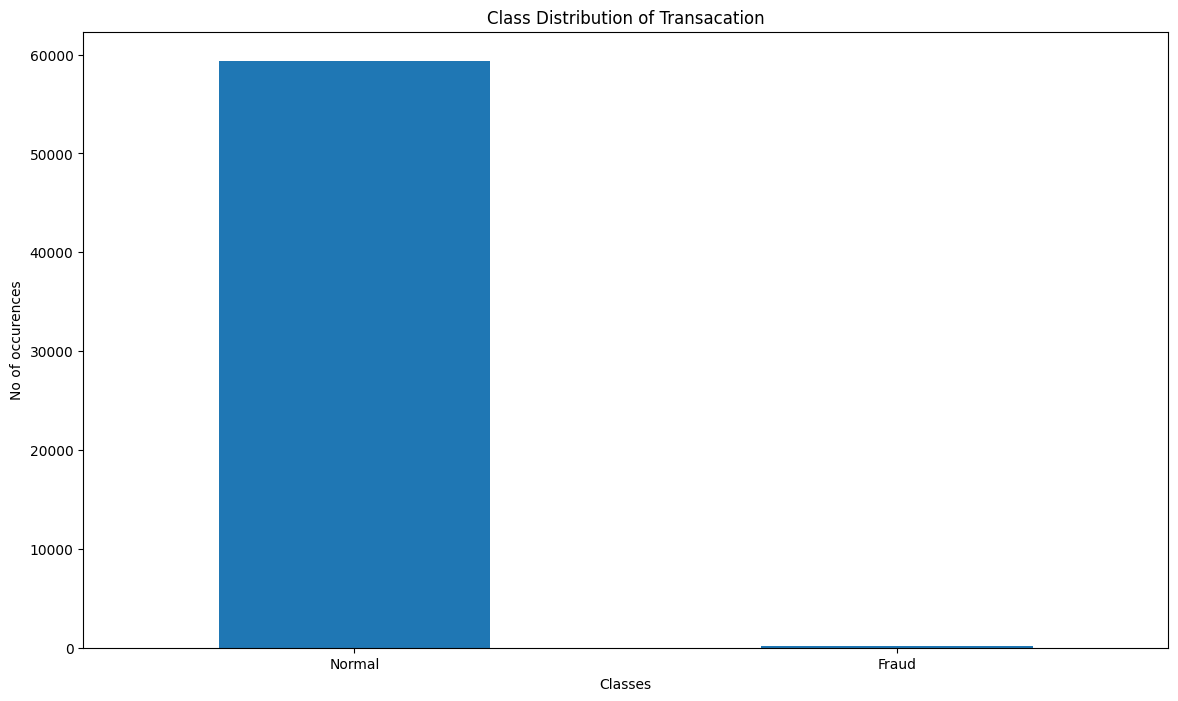

In [ ]:
set_class = pd.value_counts(card_data['Class'], sort= True)

set_class.plot(kind = 'bar' , rot=0)

plt.title ("Class Distribution of Transacation")

plt.xticks (range(2), LABELS)

plt.xlabel ("Classes")

plt.ylabel ("No of occurences")

In [ ]:
fraud_data = card_data[card_data['Amount'] == 1]
Normal_data = card_data[card_data['Amount'] == 0]

In [ ]:
print(fraud_data.shape, Normal_data.shape)


(2439, 31) (477, 31)


In [ ]:
fraud_data.Amount.describe()



count    2439.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: Amount, dtype: float64

In [ ]:
Normal_data.Amount.describe()

count    477.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Amount, dtype: float64

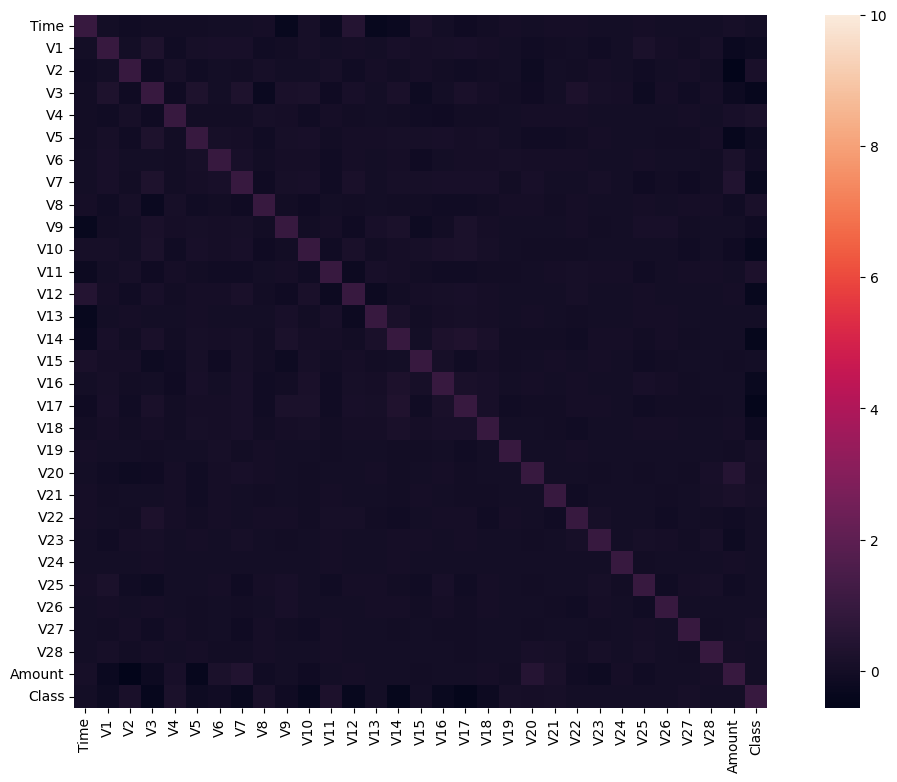

In [ ]:
correlation = card_data.corr()
plotting = plt.figure(figsize=(15,9))


#plotting Heatmap
sns.heatmap(correlation, vmax=10, square=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

print("x_train : ", x_train.shape)
print("x_test : ", x_test.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)

x_train :  (47608, 30)
x_test :  (11903, 30)
y_train :  (47608,)
y_test :  (11903,)


In [ ]:
x = card_data.drop(['Class'], axis=1)
y = card_data['Class']
print(x.shape)
print(y.shape)

xData = x.values
yData = y.values

(59511, 30)
(59511,)


In [ ]:
model = LogisticRegression()

In [ ]:
x = card_data.drop(['Class'], axis=1)

In [ ]:
y= card_data['Class']

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef

In [ ]:
n_outliers = len(fraud_data)
print("The model is Random Forest Classifier")


The model is Random Forest Classifier
